In [1]:
import os
import glob
import random

import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import mr

In [4]:
from mrcnn import model as modellib
from mrcnn import visualize

Using TensorFlow backend.


In [5]:
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
config = mr.TrainConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        30
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 10.0}
MASK_POOL_SIZE                 14
MASK_SHAPE            

In [7]:
work_path = os.path.join("E:", os.sep, "RCNNPipes512Train")

os.chdir(work_path)

tif_glob = glob.glob(os.path.join("*", "images", "*.tif"))
n = int(len(tif_glob) * .8)

ds_train = mr.MRDataset()
ds_train.load_glob(tif_glob[:n])
ds_train.prepare()

ds_valid = mr.MRDataset()
ds_valid.load_glob(tif_glob[n:])
ds_valid.prepare()

In [8]:
len(tif_glob)

18094

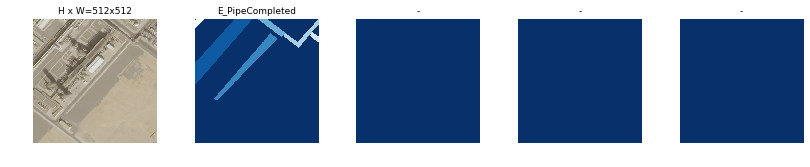

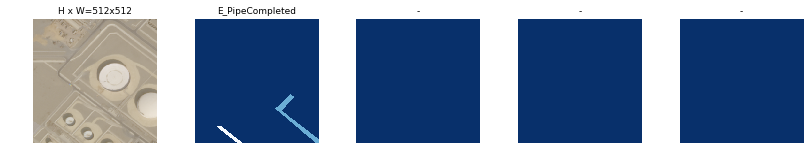

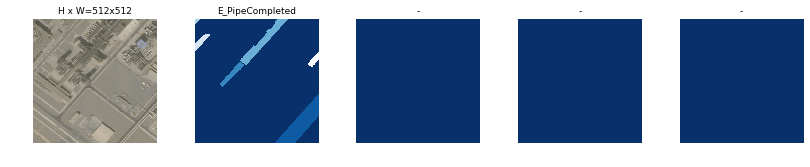

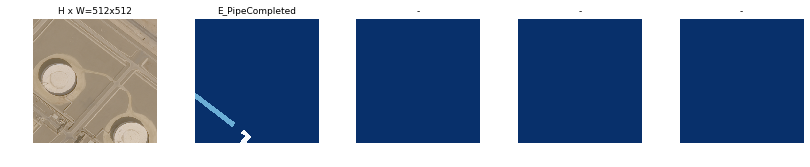

In [9]:
image_ids = np.random.choice(ds_train.image_ids,4)
for image_id in image_ids:
    image = ds_train.load_image(image_id)
    mask, class_ids = ds_train.load_mask(image_id)
    visualize.display_top_masks(image,mask,class_ids,ds_train.class_names)

In [10]:
model = modellib.MaskRCNN(mode="training",
                          config=config,
                          model_dir="logs")

In [11]:
# Which weights to start with?
init_with = "imagenet"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(mr.COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits",
                                "mrcnn_bbox_fc", 
                                "mrcnn_bbox",
                                "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model_path = model.find_last()
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)

In [12]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE, 
            epochs=60, 
            layers='heads')


Starting at epoch 0. LR=0.0001

Checkpoint Path: logs\mr20190517T2055\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/60
50/50 [==============================] - 96s 2s/step - loss: 11.1419 - rpn_class_loss: 0.4911 - rpn_bbox_loss: 2.3588 - mrcnn_class_loss: 0.3145 - mrcnn_bbox_loss: 1.0726 - mrcnn_mask_loss: 6.9049 - val_loss: 9.3731 - val_rpn_class_loss: 0.3759 - val_rpn_bbox_loss: 2.3205 - val_mrcnn_class_loss: 0.3134 - val_mrcnn_bbox_loss: 0.8334 - val_mrcnn_mask_loss: 5.5299
Epoch 2/60
50/50 [==============================] - 79s 2s/step - loss: 8.8848 - rpn_class_loss: 0.3623 - rpn_bbox_loss: 1.8905 - mrcnn_class_loss: 0.2619 - mrcnn_bbox_loss: 0.8199 - mrcnn_mask_loss: 5.5503 - val_loss: 8.3014 - val_rpn_class_loss: 0.3165 - val_rpn_bbox_loss: 1.6194 - val_mrcnn_class_loss: 0.2098 - val_mrcnn_bbox_loss: 0.7989 - val_mrcnn_mask_loss: 5.3568
Epoch 3/60
50/50 [==============================] - 79s 2s/step - loss: 8.8306 - rpn_class_loss: 0.3405 - rpn_bbox_loss: 2.0302 - mrcnn_class_loss: 0.2497 - mrcnn_bbox_loss: 0.7814 - mrcnn_mask_loss: 5.4288 - val_loss: 8.5436 - val_rpn_class_loss: 0.3

Epoch 23/60
50/50 [==============================] - 83s 2s/step - loss: 7.5316 - rpn_class_loss: 0.2189 - rpn_bbox_loss: 1.8299 - mrcnn_class_loss: 0.2210 - mrcnn_bbox_loss: 0.5951 - mrcnn_mask_loss: 4.6667 - val_loss: 6.9808 - val_rpn_class_loss: 0.2459 - val_rpn_bbox_loss: 1.2469 - val_mrcnn_class_loss: 0.2430 - val_mrcnn_bbox_loss: 0.5935 - val_mrcnn_mask_loss: 4.6515
Epoch 24/60
50/50 [==============================] - 84s 2s/step - loss: 7.0205 - rpn_class_loss: 0.2115 - rpn_bbox_loss: 1.4047 - mrcnn_class_loss: 0.2368 - mrcnn_bbox_loss: 0.5845 - mrcnn_mask_loss: 4.5830 - val_loss: 7.0444 - val_rpn_class_loss: 0.2361 - val_rpn_bbox_loss: 1.4088 - val_mrcnn_class_loss: 0.2337 - val_mrcnn_bbox_loss: 0.5769 - val_mrcnn_mask_loss: 4.5889
Epoch 25/60
50/50 [==============================] - 83s 2s/step - loss: 7.0606 - rpn_class_loss: 0.1995 - rpn_bbox_loss: 1.5055 - mrcnn_class_loss: 0.2050 - mrcnn_bbox_loss: 0.5832 - mrcnn_mask_loss: 4.5675 - val_loss: 7.3619 - val_rpn_class_loss: 0

Epoch 45/60
50/50 [==============================] - 88s 2s/step - loss: 6.3867 - rpn_class_loss: 0.1931 - rpn_bbox_loss: 1.2644 - mrcnn_class_loss: 0.2321 - mrcnn_bbox_loss: 0.5236 - mrcnn_mask_loss: 4.1735 - val_loss: 6.5466 - val_rpn_class_loss: 0.1909 - val_rpn_bbox_loss: 1.3966 - val_mrcnn_class_loss: 0.2506 - val_mrcnn_bbox_loss: 0.5209 - val_mrcnn_mask_loss: 4.1876
Epoch 46/60
50/50 [==============================] - 86s 2s/step - loss: 6.5110 - rpn_class_loss: 0.1717 - rpn_bbox_loss: 1.4427 - mrcnn_class_loss: 0.2007 - mrcnn_bbox_loss: 0.5282 - mrcnn_mask_loss: 4.1676 - val_loss: 6.6084 - val_rpn_class_loss: 0.1899 - val_rpn_bbox_loss: 1.5364 - val_mrcnn_class_loss: 0.2176 - val_mrcnn_bbox_loss: 0.5359 - val_mrcnn_mask_loss: 4.1286
Epoch 47/60
50/50 [==============================] - 89s 2s/step - loss: 6.3456 - rpn_class_loss: 0.1764 - rpn_bbox_loss: 1.2367 - mrcnn_class_loss: 0.2398 - mrcnn_bbox_loss: 0.5212 - mrcnn_mask_loss: 4.1715 - val_loss: 6.4205 - val_rpn_class_loss: 0

In [13]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE,
            epochs=120, 
            layers="4+")


Starting at epoch 60. LR=0.0001

Checkpoint Path: logs\mr20190517T2055\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
res4a_branch2a         (Conv2D)
bn4a_branch2a          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4a_branch2c          (BatchNorm)
bn4a_branch1           (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4b_branch2c          (BatchNorm)
res4c_branch2a         (Conv2D)
bn4c_branch2a          (BatchNorm)
res4c_branch2b         (Conv2D)
bn4c_branch2b          (BatchNorm)
res4c_branch2c         (Conv2D)
bn4c_branch2c          (BatchNorm)
res4d_branch2a         (Conv2D)
bn4d_branch2a          (BatchNorm)
res4d_branch2b         (Conv2D)
bn4d_branch2b          (BatchNorm)
res4d_branch2c         (Conv2D)
bn4d_branch2c          (BatchNorm)
res

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 61/120
50/50 [==============================] - 122s 2s/step - loss: 6.1164 - rpn_class_loss: 0.1773 - rpn_bbox_loss: 1.1065 - mrcnn_class_loss: 0.2377 - mrcnn_bbox_loss: 0.5056 - mrcnn_mask_loss: 4.0894 - val_loss: 5.9621 - val_rpn_class_loss: 0.1673 - val_rpn_bbox_loss: 0.9958 - val_mrcnn_class_loss: 0.2026 - val_mrcnn_bbox_loss: 0.5140 - val_mrcnn_mask_loss: 4.0825
Epoch 62/120
50/50 [==============================] - 93s 2s/step - loss: 6.0715 - rpn_class_loss: 0.1732 - rpn_bbox_loss: 1.1695 - mrcnn_class_loss: 0.2252 - mrcnn_bbox_loss: 0.4997 - mrcnn_mask_loss: 4.0039 - val_loss: 6.0961 - val_rpn_class_loss: 0.1687 - val_rpn_bbox_loss: 1.1438 - val_mrcnn_class_loss: 0.2124 - val_mrcnn_bbox_loss: 0.4957 - val_mrcnn_mask_loss: 4.0755
Epoch 63/120
50/50 [==============================] - 92s 2s/step - loss: 6.3539 - rpn_class_loss: 0.1701 - rpn_bbox_loss: 1.4142 - mrcnn_class_loss: 0.2231 - mrcnn_bbox_loss: 0.4931 - mrcnn_mask_loss: 4.0534 - val_loss: 5.6506 - val_rpn_class_los

Epoch 83/120
50/50 [==============================] - 94s 2s/step - loss: 5.9717 - rpn_class_loss: 0.1479 - rpn_bbox_loss: 1.5229 - mrcnn_class_loss: 0.2098 - mrcnn_bbox_loss: 0.4622 - mrcnn_mask_loss: 3.6289 - val_loss: 5.1835 - val_rpn_class_loss: 0.1600 - val_rpn_bbox_loss: 0.7059 - val_mrcnn_class_loss: 0.2512 - val_mrcnn_bbox_loss: 0.4659 - val_mrcnn_mask_loss: 3.6005
Epoch 84/120
50/50 [==============================] - 94s 2s/step - loss: 5.5912 - rpn_class_loss: 0.1431 - rpn_bbox_loss: 1.1513 - mrcnn_class_loss: 0.2177 - mrcnn_bbox_loss: 0.4576 - mrcnn_mask_loss: 3.6215 - val_loss: 5.5946 - val_rpn_class_loss: 0.1666 - val_rpn_bbox_loss: 1.1850 - val_mrcnn_class_loss: 0.2148 - val_mrcnn_bbox_loss: 0.4709 - val_mrcnn_mask_loss: 3.5572
Epoch 85/120
50/50 [==============================] - 95s 2s/step - loss: 5.3514 - rpn_class_loss: 0.1479 - rpn_bbox_loss: 0.8928 - mrcnn_class_loss: 0.2361 - mrcnn_bbox_loss: 0.4610 - mrcnn_mask_loss: 3.6136 - val_loss: 5.9281 - val_rpn_class_loss

Epoch 105/120
50/50 [==============================] - 95s 2s/step - loss: 5.2188 - rpn_class_loss: 0.1342 - rpn_bbox_loss: 1.1049 - mrcnn_class_loss: 0.2109 - mrcnn_bbox_loss: 0.4300 - mrcnn_mask_loss: 3.3388 - val_loss: 5.2845 - val_rpn_class_loss: 0.1355 - val_rpn_bbox_loss: 0.9095 - val_mrcnn_class_loss: 0.2561 - val_mrcnn_bbox_loss: 0.4583 - val_mrcnn_mask_loss: 3.5251
Epoch 106/120
50/50 [==============================] - 94s 2s/step - loss: 5.1976 - rpn_class_loss: 0.1319 - rpn_bbox_loss: 1.0259 - mrcnn_class_loss: 0.2120 - mrcnn_bbox_loss: 0.4250 - mrcnn_mask_loss: 3.4028 - val_loss: 5.2167 - val_rpn_class_loss: 0.1149 - val_rpn_bbox_loss: 1.1370 - val_mrcnn_class_loss: 0.1723 - val_mrcnn_bbox_loss: 0.4231 - val_mrcnn_mask_loss: 3.3695
Epoch 107/120
50/50 [==============================] - 95s 2s/step - loss: 5.0636 - rpn_class_loss: 0.1311 - rpn_bbox_loss: 0.9727 - mrcnn_class_loss: 0.2070 - mrcnn_bbox_loss: 0.4336 - mrcnn_mask_loss: 3.3192 - val_loss: 5.1237 - val_rpn_class_l

In [ ]:
model.train(ds_train, ds_valid, 
            learning_rate=config.LEARNING_RATE / 10.0,
            epochs=500, 
            layers="all")


Starting at epoch 120. LR=1e-05

Checkpoint Path: logs\mr20190517T2055\mask_rcnn_mr_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b          (BatchNorm)
res

C:\Users\raadm0\AppData\Local\ESRI\conda\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 121/500
50/50 [==============================] - 133s 3s/step - loss: 4.9661 - rpn_class_loss: 0.1260 - rpn_bbox_loss: 1.0249 - mrcnn_class_loss: 0.1990 - mrcnn_bbox_loss: 0.4054 - mrcnn_mask_loss: 3.2108 - val_loss: 4.8595 - val_rpn_class_loss: 0.1401 - val_rpn_bbox_loss: 0.7714 - val_mrcnn_class_loss: 0.2001 - val_mrcnn_bbox_loss: 0.4147 - val_mrcnn_mask_loss: 3.3332
Epoch 122/500
50/50 [==============================] - 100s 2s/step - loss: 5.1306 - rpn_class_loss: 0.1243 - rpn_bbox_loss: 1.0666 - mrcnn_class_loss: 0.2139 - mrcnn_bbox_loss: 0.4074 - mrcnn_mask_loss: 3.3183 - val_loss: 4.9850 - val_rpn_class_loss: 0.1353 - val_rpn_bbox_loss: 0.9796 - val_mrcnn_class_loss: 0.1904 - val_mrcnn_bbox_loss: 0.4130 - val_mrcnn_mask_loss: 3.2666
Epoch 123/500
50/50 [==============================] - 99s 2s/step - loss: 4.7223 - rpn_class_loss: 0.1133 - rpn_bbox_loss: 0.7423 - mrcnn_class_loss: 0.1939 - mrcnn_bbox_loss: 0.4079 - mrcnn_mask_loss: 3.2648 - val_loss: 4.8127 - val_rpn_class

Epoch 143/500
50/50 [==============================] - 97s 2s/step - loss: 4.9162 - rpn_class_loss: 0.1147 - rpn_bbox_loss: 1.0110 - mrcnn_class_loss: 0.1831 - mrcnn_bbox_loss: 0.4042 - mrcnn_mask_loss: 3.2033 - val_loss: 5.0637 - val_rpn_class_loss: 0.1314 - val_rpn_bbox_loss: 1.0455 - val_mrcnn_class_loss: 0.2238 - val_mrcnn_bbox_loss: 0.4073 - val_mrcnn_mask_loss: 3.2557
Epoch 144/500
50/50 [==============================] - 100s 2s/step - loss: 4.8438 - rpn_class_loss: 0.1151 - rpn_bbox_loss: 0.8423 - mrcnn_class_loss: 0.2096 - mrcnn_bbox_loss: 0.4084 - mrcnn_mask_loss: 3.2683 - val_loss: 5.2090 - val_rpn_class_loss: 0.1467 - val_rpn_bbox_loss: 0.9553 - val_mrcnn_class_loss: 0.2344 - val_mrcnn_bbox_loss: 0.4090 - val_mrcnn_mask_loss: 3.4635
Epoch 145/500
50/50 [==============================] - 98s 2s/step - loss: 4.9787 - rpn_class_loss: 0.1248 - rpn_bbox_loss: 1.0444 - mrcnn_class_loss: 0.1988 - mrcnn_bbox_loss: 0.4069 - mrcnn_mask_loss: 3.2037 - val_loss: 5.1257 - val_rpn_class_

Epoch 165/500
50/50 [==============================] - 99s 2s/step - loss: 5.0674 - rpn_class_loss: 0.1210 - rpn_bbox_loss: 1.0946 - mrcnn_class_loss: 0.2138 - mrcnn_bbox_loss: 0.4061 - mrcnn_mask_loss: 3.2319 - val_loss: 5.1518 - val_rpn_class_loss: 0.1160 - val_rpn_bbox_loss: 1.0796 - val_mrcnn_class_loss: 0.1969 - val_mrcnn_bbox_loss: 0.3918 - val_mrcnn_mask_loss: 3.3676
Epoch 166/500
50/50 [==============================] - 100s 2s/step - loss: 4.9784 - rpn_class_loss: 0.1215 - rpn_bbox_loss: 1.0265 - mrcnn_class_loss: 0.1980 - mrcnn_bbox_loss: 0.4025 - mrcnn_mask_loss: 3.2298 - val_loss: 5.7086 - val_rpn_class_loss: 0.1493 - val_rpn_bbox_loss: 1.7266 - val_mrcnn_class_loss: 0.2402 - val_mrcnn_bbox_loss: 0.4261 - val_mrcnn_mask_loss: 3.1665
Epoch 167/500
50/50 [==============================] - 99s 2s/step - loss: 4.7313 - rpn_class_loss: 0.1223 - rpn_bbox_loss: 0.9434 - mrcnn_class_loss: 0.1887 - mrcnn_bbox_loss: 0.3905 - mrcnn_mask_loss: 3.0864 - val_loss: 5.2404 - val_rpn_class_

Epoch 187/500
50/50 [==============================] - 99s 2s/step - loss: 4.6711 - rpn_class_loss: 0.1203 - rpn_bbox_loss: 0.7637 - mrcnn_class_loss: 0.1895 - mrcnn_bbox_loss: 0.3972 - mrcnn_mask_loss: 3.2003 - val_loss: 5.5536 - val_rpn_class_loss: 0.1090 - val_rpn_bbox_loss: 1.6930 - val_mrcnn_class_loss: 0.1862 - val_mrcnn_bbox_loss: 0.3982 - val_mrcnn_mask_loss: 3.1673
Epoch 188/500
50/50 [==============================] - 98s 2s/step - loss: 4.8584 - rpn_class_loss: 0.1105 - rpn_bbox_loss: 1.0042 - mrcnn_class_loss: 0.1930 - mrcnn_bbox_loss: 0.3980 - mrcnn_mask_loss: 3.1527 - val_loss: 4.5445 - val_rpn_class_loss: 0.0973 - val_rpn_bbox_loss: 0.5963 - val_mrcnn_class_loss: 0.1949 - val_mrcnn_bbox_loss: 0.4110 - val_mrcnn_mask_loss: 3.2449
Epoch 189/500
50/50 [==============================] - 98s 2s/step - loss: 4.9648 - rpn_class_loss: 0.1161 - rpn_bbox_loss: 1.1287 - mrcnn_class_loss: 0.1844 - mrcnn_bbox_loss: 0.4045 - mrcnn_mask_loss: 3.1310 - val_loss: 4.3760 - val_rpn_class_l

Epoch 209/500
50/50 [==============================] - 99s 2s/step - loss: 5.0992 - rpn_class_loss: 0.1238 - rpn_bbox_loss: 1.2007 - mrcnn_class_loss: 0.2108 - mrcnn_bbox_loss: 0.3918 - mrcnn_mask_loss: 3.1721 - val_loss: 4.9449 - val_rpn_class_loss: 0.1151 - val_rpn_bbox_loss: 0.9112 - val_mrcnn_class_loss: 0.1822 - val_mrcnn_bbox_loss: 0.4069 - val_mrcnn_mask_loss: 3.3294
Epoch 210/500
50/50 [==============================] - 95s 2s/step - loss: 4.6873 - rpn_class_loss: 0.1098 - rpn_bbox_loss: 0.8134 - mrcnn_class_loss: 0.1876 - mrcnn_bbox_loss: 0.4013 - mrcnn_mask_loss: 3.1752 - val_loss: 4.8823 - val_rpn_class_loss: 0.0962 - val_rpn_bbox_loss: 0.9888 - val_mrcnn_class_loss: 0.1684 - val_mrcnn_bbox_loss: 0.4038 - val_mrcnn_mask_loss: 3.2250
Epoch 211/500
50/50 [==============================] - 98s 2s/step - loss: 4.7578 - rpn_class_loss: 0.1176 - rpn_bbox_loss: 0.8750 - mrcnn_class_loss: 0.2067 - mrcnn_bbox_loss: 0.3927 - mrcnn_mask_loss: 3.1658 - val_loss: 5.6941 - val_rpn_class_l

Epoch 231/500
50/50 [==============================] - 98s 2s/step - loss: 4.9403 - rpn_class_loss: 0.1329 - rpn_bbox_loss: 1.0521 - mrcnn_class_loss: 0.2010 - mrcnn_bbox_loss: 0.3952 - mrcnn_mask_loss: 3.1592 - val_loss: 5.6356 - val_rpn_class_loss: 0.1352 - val_rpn_bbox_loss: 1.7176 - val_mrcnn_class_loss: 0.1855 - val_mrcnn_bbox_loss: 0.4130 - val_mrcnn_mask_loss: 3.1843
Epoch 232/500
50/50 [==============================] - 97s 2s/step - loss: 4.9250 - rpn_class_loss: 0.1143 - rpn_bbox_loss: 1.1153 - mrcnn_class_loss: 0.1941 - mrcnn_bbox_loss: 0.3942 - mrcnn_mask_loss: 3.1071 - val_loss: 4.9859 - val_rpn_class_loss: 0.1132 - val_rpn_bbox_loss: 1.0579 - val_mrcnn_class_loss: 0.1696 - val_mrcnn_bbox_loss: 0.3987 - val_mrcnn_mask_loss: 3.2466
Epoch 233/500
50/50 [==============================] - 101s 2s/step - loss: 4.8517 - rpn_class_loss: 0.1228 - rpn_bbox_loss: 0.9091 - mrcnn_class_loss: 0.2212 - mrcnn_bbox_loss: 0.3998 - mrcnn_mask_loss: 3.1988 - val_loss: 5.0779 - val_rpn_class_

Epoch 253/500
50/50 [==============================] - 98s 2s/step - loss: 5.0888 - rpn_class_loss: 0.1171 - rpn_bbox_loss: 1.2718 - mrcnn_class_loss: 0.1963 - mrcnn_bbox_loss: 0.3861 - mrcnn_mask_loss: 3.1175 - val_loss: 5.0123 - val_rpn_class_loss: 0.1204 - val_rpn_bbox_loss: 1.1574 - val_mrcnn_class_loss: 0.1957 - val_mrcnn_bbox_loss: 0.3997 - val_mrcnn_mask_loss: 3.1391
Epoch 254/500
50/50 [==============================] - 99s 2s/step - loss: 5.1308 - rpn_class_loss: 0.1235 - rpn_bbox_loss: 1.2031 - mrcnn_class_loss: 0.1936 - mrcnn_bbox_loss: 0.3958 - mrcnn_mask_loss: 3.2150 - val_loss: 4.6356 - val_rpn_class_loss: 0.1173 - val_rpn_bbox_loss: 0.6943 - val_mrcnn_class_loss: 0.2527 - val_mrcnn_bbox_loss: 0.4138 - val_mrcnn_mask_loss: 3.1575
Epoch 255/500
50/50 [==============================] - 98s 2s/step - loss: 4.6486 - rpn_class_loss: 0.1136 - rpn_bbox_loss: 0.8531 - mrcnn_class_loss: 0.1840 - mrcnn_bbox_loss: 0.3868 - mrcnn_mask_loss: 3.1111 - val_loss: 4.3318 - val_rpn_class_l

Epoch 275/500
50/50 [==============================] - 96s 2s/step - loss: 4.7577 - rpn_class_loss: 0.1108 - rpn_bbox_loss: 0.9846 - mrcnn_class_loss: 0.1799 - mrcnn_bbox_loss: 0.3800 - mrcnn_mask_loss: 3.1024 - val_loss: 4.9981 - val_rpn_class_loss: 0.1169 - val_rpn_bbox_loss: 0.9695 - val_mrcnn_class_loss: 0.1947 - val_mrcnn_bbox_loss: 0.4112 - val_mrcnn_mask_loss: 3.3058
Epoch 276/500
50/50 [==============================] - 97s 2s/step - loss: 4.7979 - rpn_class_loss: 0.1158 - rpn_bbox_loss: 1.0497 - mrcnn_class_loss: 0.1782 - mrcnn_bbox_loss: 0.3862 - mrcnn_mask_loss: 3.0681 - val_loss: 4.7001 - val_rpn_class_loss: 0.1153 - val_rpn_bbox_loss: 0.8714 - val_mrcnn_class_loss: 0.2130 - val_mrcnn_bbox_loss: 0.3964 - val_mrcnn_mask_loss: 3.1039
Epoch 277/500
50/50 [==============================] - 99s 2s/step - loss: 4.9414 - rpn_class_loss: 0.1181 - rpn_bbox_loss: 1.0761 - mrcnn_class_loss: 0.2063 - mrcnn_bbox_loss: 0.3876 - mrcnn_mask_loss: 3.1532 - val_loss: 4.8580 - val_rpn_class_l

Epoch 297/500
50/50 [==============================] - 97s 2s/step - loss: 4.8205 - rpn_class_loss: 0.1231 - rpn_bbox_loss: 1.0436 - mrcnn_class_loss: 0.1913 - mrcnn_bbox_loss: 0.3828 - mrcnn_mask_loss: 3.0798 - val_loss: 5.0078 - val_rpn_class_loss: 0.1169 - val_rpn_bbox_loss: 1.1802 - val_mrcnn_class_loss: 0.1918 - val_mrcnn_bbox_loss: 0.3897 - val_mrcnn_mask_loss: 3.1292
Epoch 298/500
50/50 [==============================] - 98s 2s/step - loss: 4.7714 - rpn_class_loss: 0.1129 - rpn_bbox_loss: 0.9808 - mrcnn_class_loss: 0.1989 - mrcnn_bbox_loss: 0.3822 - mrcnn_mask_loss: 3.0965 - val_loss: 4.7374 - val_rpn_class_loss: 0.1011 - val_rpn_bbox_loss: 0.6830 - val_mrcnn_class_loss: 0.1878 - val_mrcnn_bbox_loss: 0.3980 - val_mrcnn_mask_loss: 3.3676
Epoch 299/500
50/50 [==============================] - 98s 2s/step - loss: 4.5739 - rpn_class_loss: 0.1071 - rpn_bbox_loss: 0.8002 - mrcnn_class_loss: 0.1970 - mrcnn_bbox_loss: 0.3816 - mrcnn_mask_loss: 3.0880 - val_loss: 5.0940 - val_rpn_class_l

Epoch 319/500
50/50 [==============================] - 98s 2s/step - loss: 4.9060 - rpn_class_loss: 0.1159 - rpn_bbox_loss: 1.1940 - mrcnn_class_loss: 0.1884 - mrcnn_bbox_loss: 0.3861 - mrcnn_mask_loss: 3.0217 - val_loss: 4.6970 - val_rpn_class_loss: 0.1211 - val_rpn_bbox_loss: 0.8587 - val_mrcnn_class_loss: 0.2239 - val_mrcnn_bbox_loss: 0.3929 - val_mrcnn_mask_loss: 3.1005
Epoch 320/500
50/50 [==============================] - 97s 2s/step - loss: 4.4506 - rpn_class_loss: 0.1066 - rpn_bbox_loss: 0.7776 - mrcnn_class_loss: 0.1872 - mrcnn_bbox_loss: 0.3765 - mrcnn_mask_loss: 3.0027 - val_loss: 4.8645 - val_rpn_class_loss: 0.1185 - val_rpn_bbox_loss: 0.8627 - val_mrcnn_class_loss: 0.1785 - val_mrcnn_bbox_loss: 0.3996 - val_mrcnn_mask_loss: 3.3051
Epoch 321/500
50/50 [==============================] - 97s 2s/step - loss: 4.8754 - rpn_class_loss: 0.1142 - rpn_bbox_loss: 1.0614 - mrcnn_class_loss: 0.1983 - mrcnn_bbox_loss: 0.3888 - mrcnn_mask_loss: 3.1127 - val_loss: 4.3922 - val_rpn_class_l

In [ ]:
inference_config = mr.InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir="logs")

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = model.find_last()
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
dataset = ds_valid
image_id = random.choice(dataset.image_ids)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, inference_config, 
                           image_id, use_mini_mask=False)

results = model.detect([original_image], verbose=0)
r = results[0]

ax1, ax2 = get_ax(1,2)
visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset.class_names, ax=ax1)
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax2)